# INTEGRATE using data from Daugaard in Matlab

1. Setup the data in DATA.h5
2. Setup the prior PRIOR.h5
    1. Setup the prior for the model parameters, and store a sample in PRIOR.h5
    2. Update PRIOR.h5 with corresponding prior data
3. Sample the posterior, and store in POST.h5    1. Compute generic posterior stats4
4. Compute and plot posterior statistics


In [1]:
% Some Paths
if ~exist('sippi_prior','file');
    addpath ../sippi
    addpath ../mgstat
    addpath ../sippi_abc
    sippi_set_path
end
addpath matlab
addpath data/DAUGGAARD/

In [2]:
% Some choices
% Set the HDF5 file with data
f_data_h5='tTEM_20230727_20230814_AVG_export.h5'
f_prior_h5 = 'PRIOR.h5'
f_post_h5 = 'POST.h5'


f_data_h5 = 'tTEM_20230727_20230814_AVG_export.h5'

f_prior_h5 = 'PRIOR.h5'

f_post_h5 = 'POST.h5'

## 1. Setup/define the data
In this case the data is allready setup

/ - 8 datasets
DATA 01/08: ELEVATION [1 6001 ]
DATA 02/08: LINE [1 6001 ]
DATA 03/08: UTMX [1 6001 ]
DATA 04/08: UTMY [1 6001 ]
DATA 05/08: d_obs [40 6001 ]
DATA 06/08: d_std [40 6001 ]
DATA 07/08: i_hm [1 26 ]
DATA 08/08: i_lm [1 14 ]
integrate_get_geometry: Reading geometry from tTEM_20230727_20230814_AVG_export.h5
integrate_get_geometry: Reading geometry from tTEM_20230727_20230814_AVG_export.h5


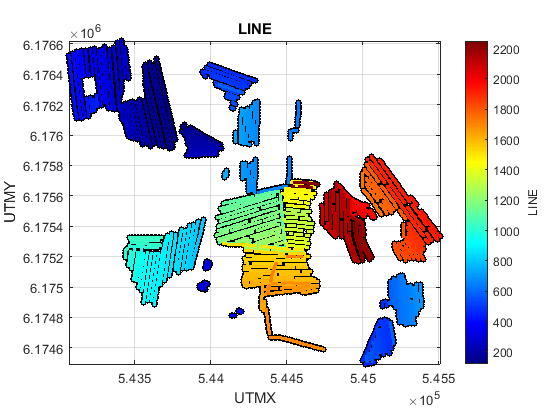

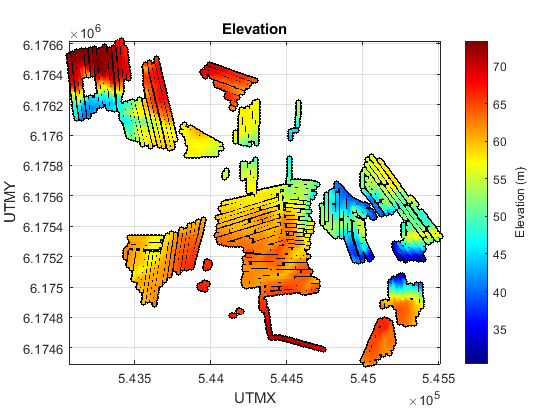

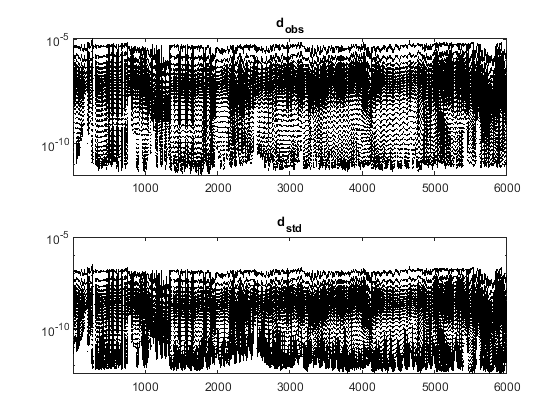

In [3]:
h5ls(f_data_h5)
% load the geometry
[X,Y,ELE,LINE]=integrate_get_geometry(f_data_h5);
% plot the data and geometry
integrate_plot_data(f_data_h5);

## 2. Setup the prior model

### 2A. Setup the prior for the model parameters
In this example a 3-6-layer type prior is chosen, and 'N' realizations are computed and stored in 'f_prior_h5'.

In [4]:
% SETUP THE PRIOR MODEL
N=100000;
clear prior
im=1;
z=0:1:100;
prior{im}.type='birthdeath';
prior{im}.x = z; % Should probably be fixed. Needed for forward to work properly
prior{im}.N_layers_min=3; % min number of layers
prior{im}.N_layers_max=6; % max number of layers
prior{im}.v_min=log10(1);        % min value in layer % conduc
prior{im}.v_max=log10(2500);        % max value in layer % conduc
prior{im}.is_log10 = 1;
prior{im}.is_discrete = 0;
prior{im}.cmap=cmap_geosoft;
prior{im}.clim=[10 2500];
prior{im}.name=sprintf('BD_%d-%d',prior{im}.N_layers_min,prior{im}.N_layers_max);

f_prior_h5 = integrate_prior_sippi(prior,N,f_prior_h5);


           +++++++++++++++++++++++++++++++++++++++++++++ 100.0 100000/100000
integrate_prior_sippi: Writing to PRIOR.h5


In [5]:
h5ls(f_prior_h5)

/ - 1 datasets
DATA 01/01: M1 [101 100000 ]
   ATT is_discrete --> 0
   ATT z --> dim [101 1 ]
   ATT clim --> dim [2 1 ]
   ATT name --> "BIRTHDEATH - Resistivity"


### 2B. Compute prior data

In [6]:
id=1; % id of the data to compute, here '/D1'
f_prior_h5 = integrate_prior_data_gaaem(f_data_h5,f_prior_h5,id);

integrate_prior_data_gaaem: Reading GEX file TX07_20230731_2x4_RC20-33.gex
read_gex: Reading 'TX07_20230731_2x4_RC20-33.gex'
WriteSTMfiles: writing LM to D:\PROGRAMMING\integrate_mockup\TX07_20230731_2x4_RC20-33_tTEM42_LM.stm
WriteSTMfiles: writing HM to D:\PROGRAMMING\integrate_mockup\TX07_20230731_2x4_RC20-33_tTEM42_HM.stm
copy PRIOR.h5 PRIOR_tTEM_20230727_20230814_AVG_export_TX07_20230731_2x4_RC20-33.h5 START
copy PRIOR.h5 PRIOR_tTEM_20230727_20230814_AVG_export_TX07_20230731_2x4_RC20-33.h5 DONE
29/11/2023 09:15:22 +++++++++++---------------------------------- 26.6 17/64
29/11/2023 09:15:21 ++++++++++++++++----------------------------- 35.9 23/64
29/11/2023 09:15:21 +++++++++++++++++---------------------------- 39.1 25/64
29/11/2023 09:15:49 ++------------------------------------------- 4.7 3/64
29/11/2023 09:15:38 ++------------------------------------------- 6.2 4/64
29/11/2023 09:15:22 ++++++++++++--------------------------------- 28.1 18/64
29/11/2023 09:16:14 +-----------------

## 3. Sample the posterior

In [7]:
f_post_h5=[];
N_use = N % Size of lookup table to use
nr = 400; % Number of realizations
autoT = 1; % Automatic annealing [0]: no, [1]: yes, [inf]: max annealing (L=1);
f_post_h5=integrate_rejection(f_prior_h5,f_data_h5,f_post_h5,N_use,nr,autoT);

N_use = 
      100000

29-Nov-2023: Starting rejection sampling
PRIOR: PRIOR_tTEM_20230727_20230814_AVG_export_TX07_20230731_2x4_RC20-33.h5
DATA: tTEM_20230727_20230814_AVG_export.h5
POST: PRIOR_tTEM_20230727_20230814_AVG_export_TX07_20230731_2x4_R_POST_Nu100000_aT1.h5
           ++------------------------------------------- 5.0 300/6001
           --------------------------------------------- 1.7 100/6001
           +-------------------------------------------- 3.3 200/6001
           ++++++++++++++++++--------------------------- 41.7 2500/6001
           ++++++++------------------------------------- 20.0 1200/6001
           ++------------------------------------------- 6.7 400/6001
           +++++++++++++-------------------------------- 30.0 1800/6001
           +++++++++++++++------------------------------ 35.0 2100/6001
           +++++++++++++++++++++++---------------------- 51.7 3100/6001
           ++++----------------------------------------- 10.0 600/6001
           ++++++-------------------------

### 3A. Compute some generic posterior statistics and update f_post_h5

In [8]:
integrate_posterior_stats(f_post_h5)
h5ls(f_post_h5)

integrate_posterior_stats: post stat for /M1, is_discrete=0
       /M1 +-------------------------------------------- 3.3 200/6001
       /M1 ++------------------------------------------- 6.7 400/6001
       /M1 ++++----------------------------------------- 10.0 600/6001
       /M1 +++++---------------------------------------- 13.3 800/6001
       /M1 +++++++-------------------------------------- 16.7 1000/6001
       /M1 ++++++++------------------------------------- 20.0 1200/6001
       /M1 ++++++++++----------------------------------- 23.3 1400/6001
       /M1 +++++++++++---------------------------------- 26.7 1600/6001
       /M1 +++++++++++++-------------------------------- 30.0 1800/6001
       /M1 ++++++++++++++------------------------------- 33.3 2000/6001
       /M1 ++++++++++++++++----------------------------- 36.7 2200/6001
       /M1 +++++++++++++++++---------------------------- 40.0 2400/6001
       /M1 +++++++++++++++++++-------------------------- 43.3 2600/6001
       /M1

In [9]:
## Plot some figures

Invalid text character. Check for unsupported symbol, invisible character, or pasting of non-ASCII characters.

### Temperarture and Evidence

integrate_get_geometry: Reading geometry from tTEM_20230727_20230814_AVG_export.h5


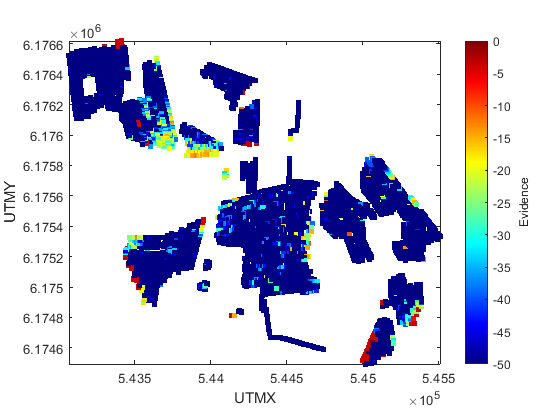

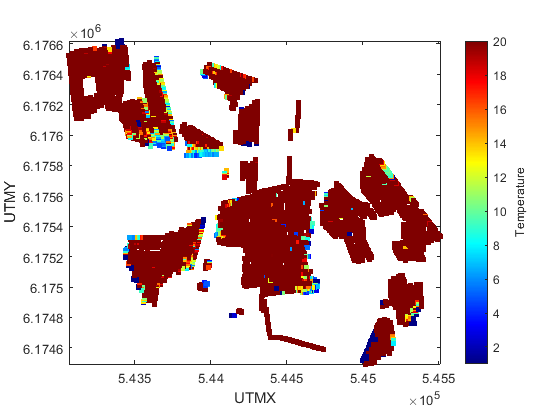

In [10]:
integrate_plot_T_EV(f_post_h5)

### 1D Posterior plot

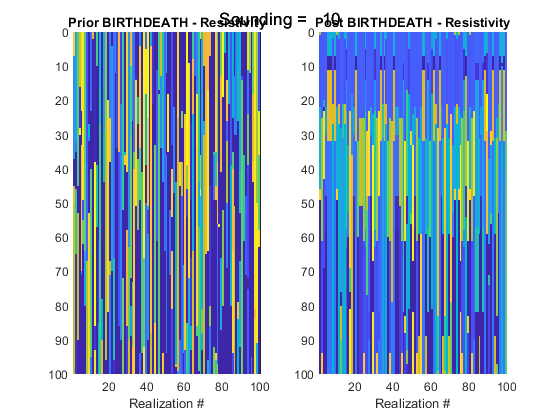

M1


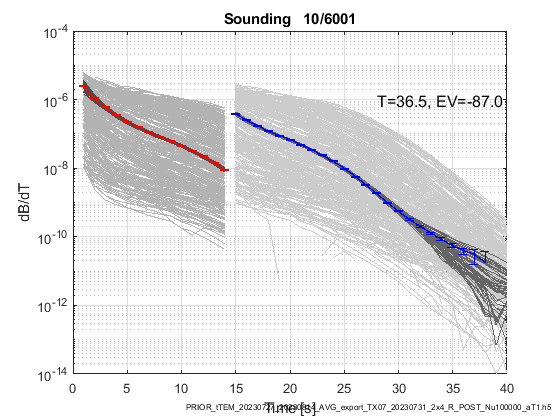

In [11]:
% plot single sounding (number 10)
figure
is=10;
integrate_plot_sounding_model(f_post_h5,is)

% plot data from sounding
figure
integrate_plot_sounding(f_post_h5,is)



### 2D Posterior plots

#### 2D Posterior data

integrate_get_geometry: Reading geometry from tTEM_20230727_20230814_AVG_export.h5


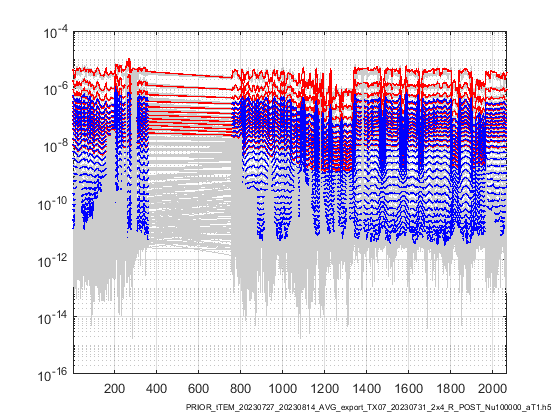

In [12]:
% Select soundings to plot 
[X,Y,ELE,LINE]=integrate_get_geometry(f_data_h5);
use_line = 500;
iplot=find( (LINE<use_line) );

% Plot many data responses
figure
integrate_plot_sounding(f_post_h5,iplot)

#### 2D Profile

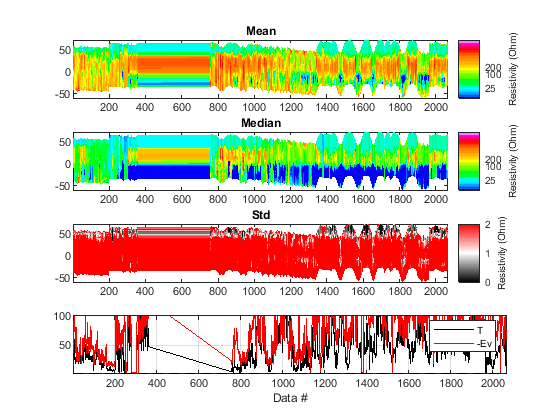

integrate_plot_profile_continuous: Plotting profile of /M1
integrate_get_geometry: Reading geometry from tTEM_20230727_20230814_AVG_export.h5


In [13]:
iplot=find( (LINE>=1900) & (LINE<=1930) );
iplot=find( (LINE<500));
integrate_plot_profile(f_post_h5,iplot);

### 3D Posterior plots

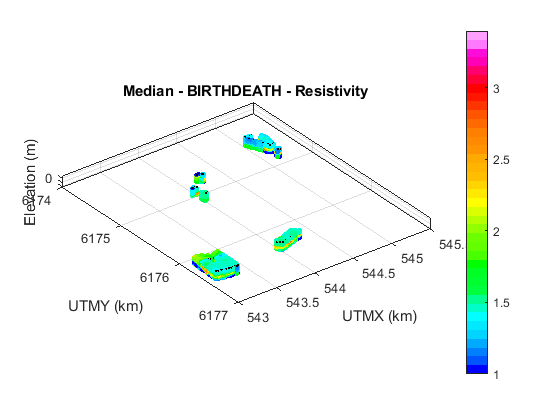

integrate_plot_3d_posterior: Plotting profile of /M1
integrate_get_geometry: Reading geometry from tTEM_20230727_20230814_AVG_export.h5


In [14]:
iplot=find( (LINE>=300) & (LINE<=500) );
figure
integrate_plot_3d_posterior(f_post_h5,'M1','Median',iplot,'doHardcopy',1)
if h5data_exist(f_prior_h5,'/M2')
    figure
    integrate_plot_3d_posterior(f_post_h5,'M2','Mode',iplot)
end
if h5data_exist(f_prior_h5,'/M3')
    figure
    integrate_plot_3d_posterior(f_post_h5,'M3','Mode',iplot)
end
